<a href="https://colab.research.google.com/github/AdarshKammar/Python/blob/main/Random_Forest_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Accuracy: 0.73

Confusion Matrix:
[[40 10]
 [14 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        50
           1       0.71      0.64      0.68        39

    accuracy                           0.73        89
   macro avg       0.73      0.72      0.72        89
weighted avg       0.73      0.73      0.73        89



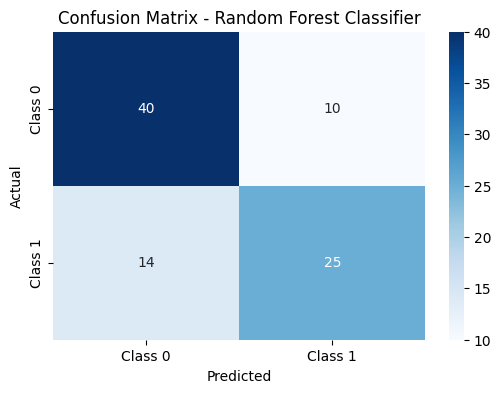

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# (a) Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data  # Features
y = (diabetes.target > diabetes.target.mean()).astype(int)  # Convert target into binary classification (0 or 1)

# (b) Use the same diabetes dataset (already loaded)

# (c) Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# (d) Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# (e) Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# (f) Evaluate the model's accuracy and print the confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()
